In [3]:
import pandas as pd
import numpy as np

In [4]:
data=pd.read_excel('/content/drive/My Drive/data/Copy of Bank_Personal_Loan_Modelling.xlsx',sheet_name=1)
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
wastecolumns=['ID','ZIP Code']

In [6]:
data1=data.drop(wastecolumns,axis=1)
data1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [7]:
data1.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
data1.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


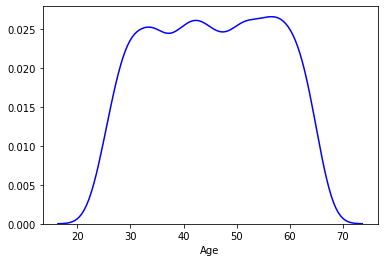

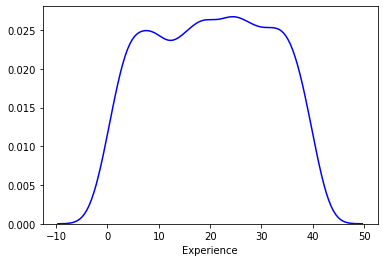

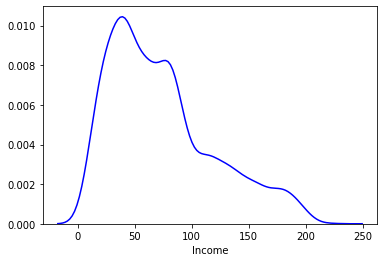

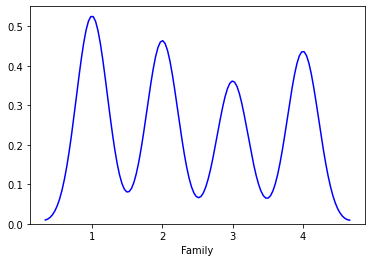

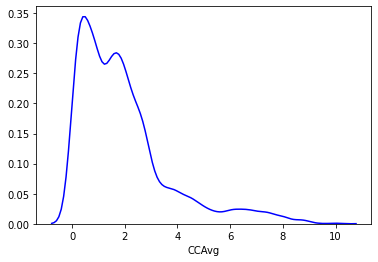

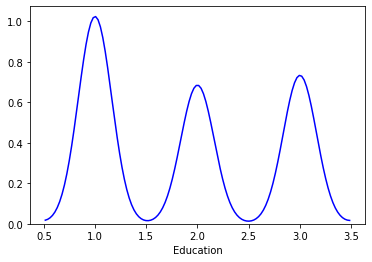

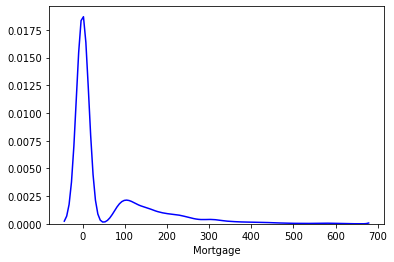

In [11]:
for i in data1.columns[0:7]:
    sns.distplot(data1[i],hist=False,color='blue')
    plt.show()

# age and Experience are normally distributed and income,ccavg,mortagage are left skewed

In [12]:
Attrition_people=data1[data1['Personal Loan']==1]
k=Attrition_people.describe()
non_Att_p=data[data['Personal Loan']==0]
f=non_Att_p.describe()
from scipy.stats import mannwhitneyu

p_values=[]
for i in data1.columns:
    stats,p=mannwhitneyu(Attrition_people[i],non_Att_p[i])
    p_values.append(p)
p_values

[0.2821982281265771,
 0.28811225857103073,
 5.175876840321634e-204,
 6.313798717684483e-06,
 1.7997250113260796e-109,
 3.024341595624272e-23,
 3.819046433025639e-06,
 0.0,
 0.06030871205290334,
 4.089449016572727e-111,
 0.32857746301681284,
 0.4215007393832062]

the attributes that sows effect on personal loan are income,ccavg,cdacc

In [13]:
data1.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052030,-0.050089,0.645993,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.041334,0.013152,-0.187524,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136537,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


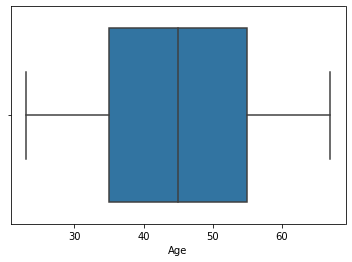

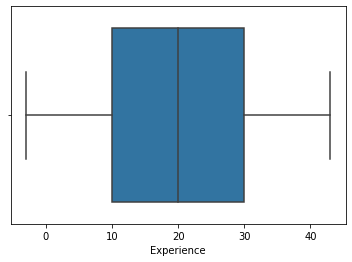

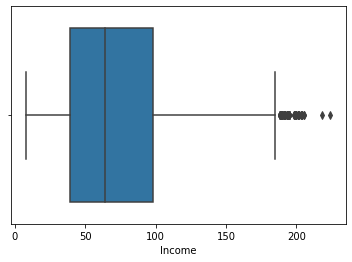

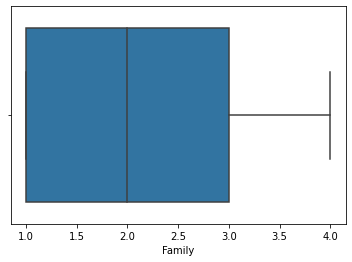

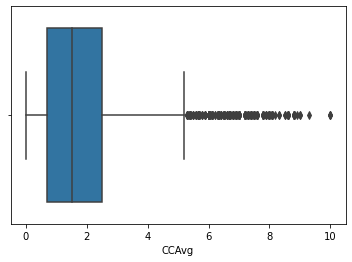

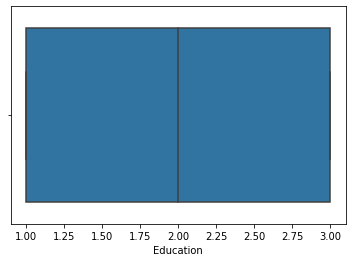

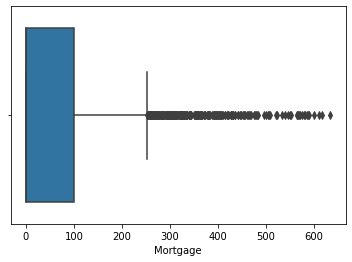

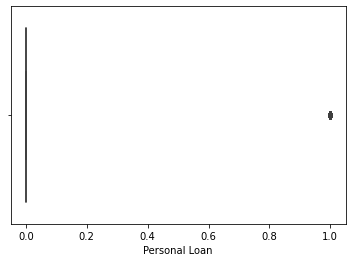

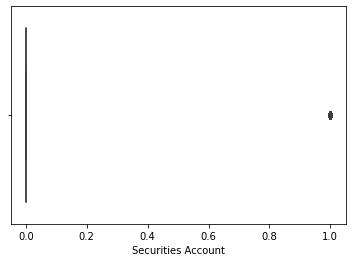

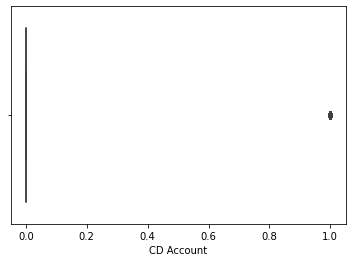

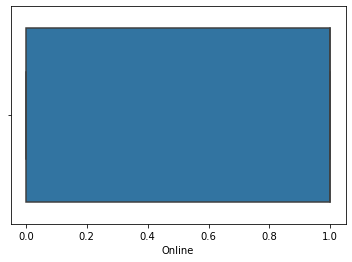

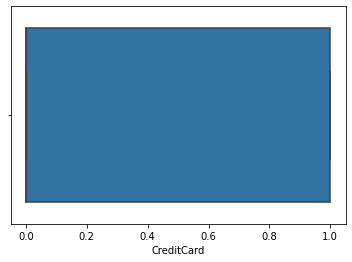

In [14]:
for i in data1.columns:
        sns.boxplot(x=i,hue='Personal Loan',data=data1)
        plt.show()

In [17]:
colwithoutliers=['Income','CCAvg','Mortgage']

In [18]:
for i in colwithoutliers:
    print(i)
    IQR=data1[i].quantile(0.75)-data1[i].quantile(0.25)
    lower_bridge=data1[i].quantile(0.25)-(IQR*1.5)
    higher_bridge=data1[i].quantile(0.75)+(IQR*1.5)
    print(IQR,lower_bridge,higher_bridge)
    

Income
59.0 -49.5 186.5
CCAvg
1.8 -2.0 5.2
Mortgage
101.0 -151.5 252.5


In [19]:
for i in colwithoutliers:
    IQR=data1[i].quantile(0.75)-data1[i].quantile(0.25)
    lower_bridge=data1[i].quantile(0.25)-(IQR*1.5)
    higher_bridge=data1[i].quantile(0.75)+(IQR*1.5)
    data1=data1[data1[i]<higher_bridge]
    print(data1[i].max())

185
5.1
244


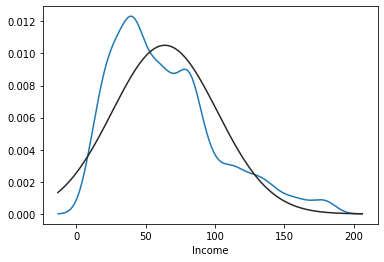

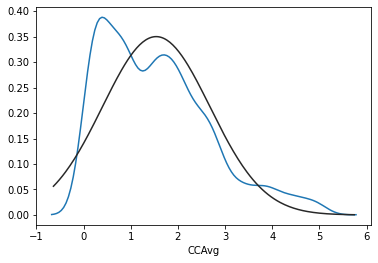

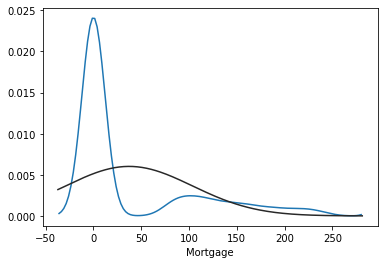

In [20]:
from scipy.stats import norm
for i in colwithoutliers:
    sns.distplot(data1[i],hist=False,fit=norm)
    plt.show()

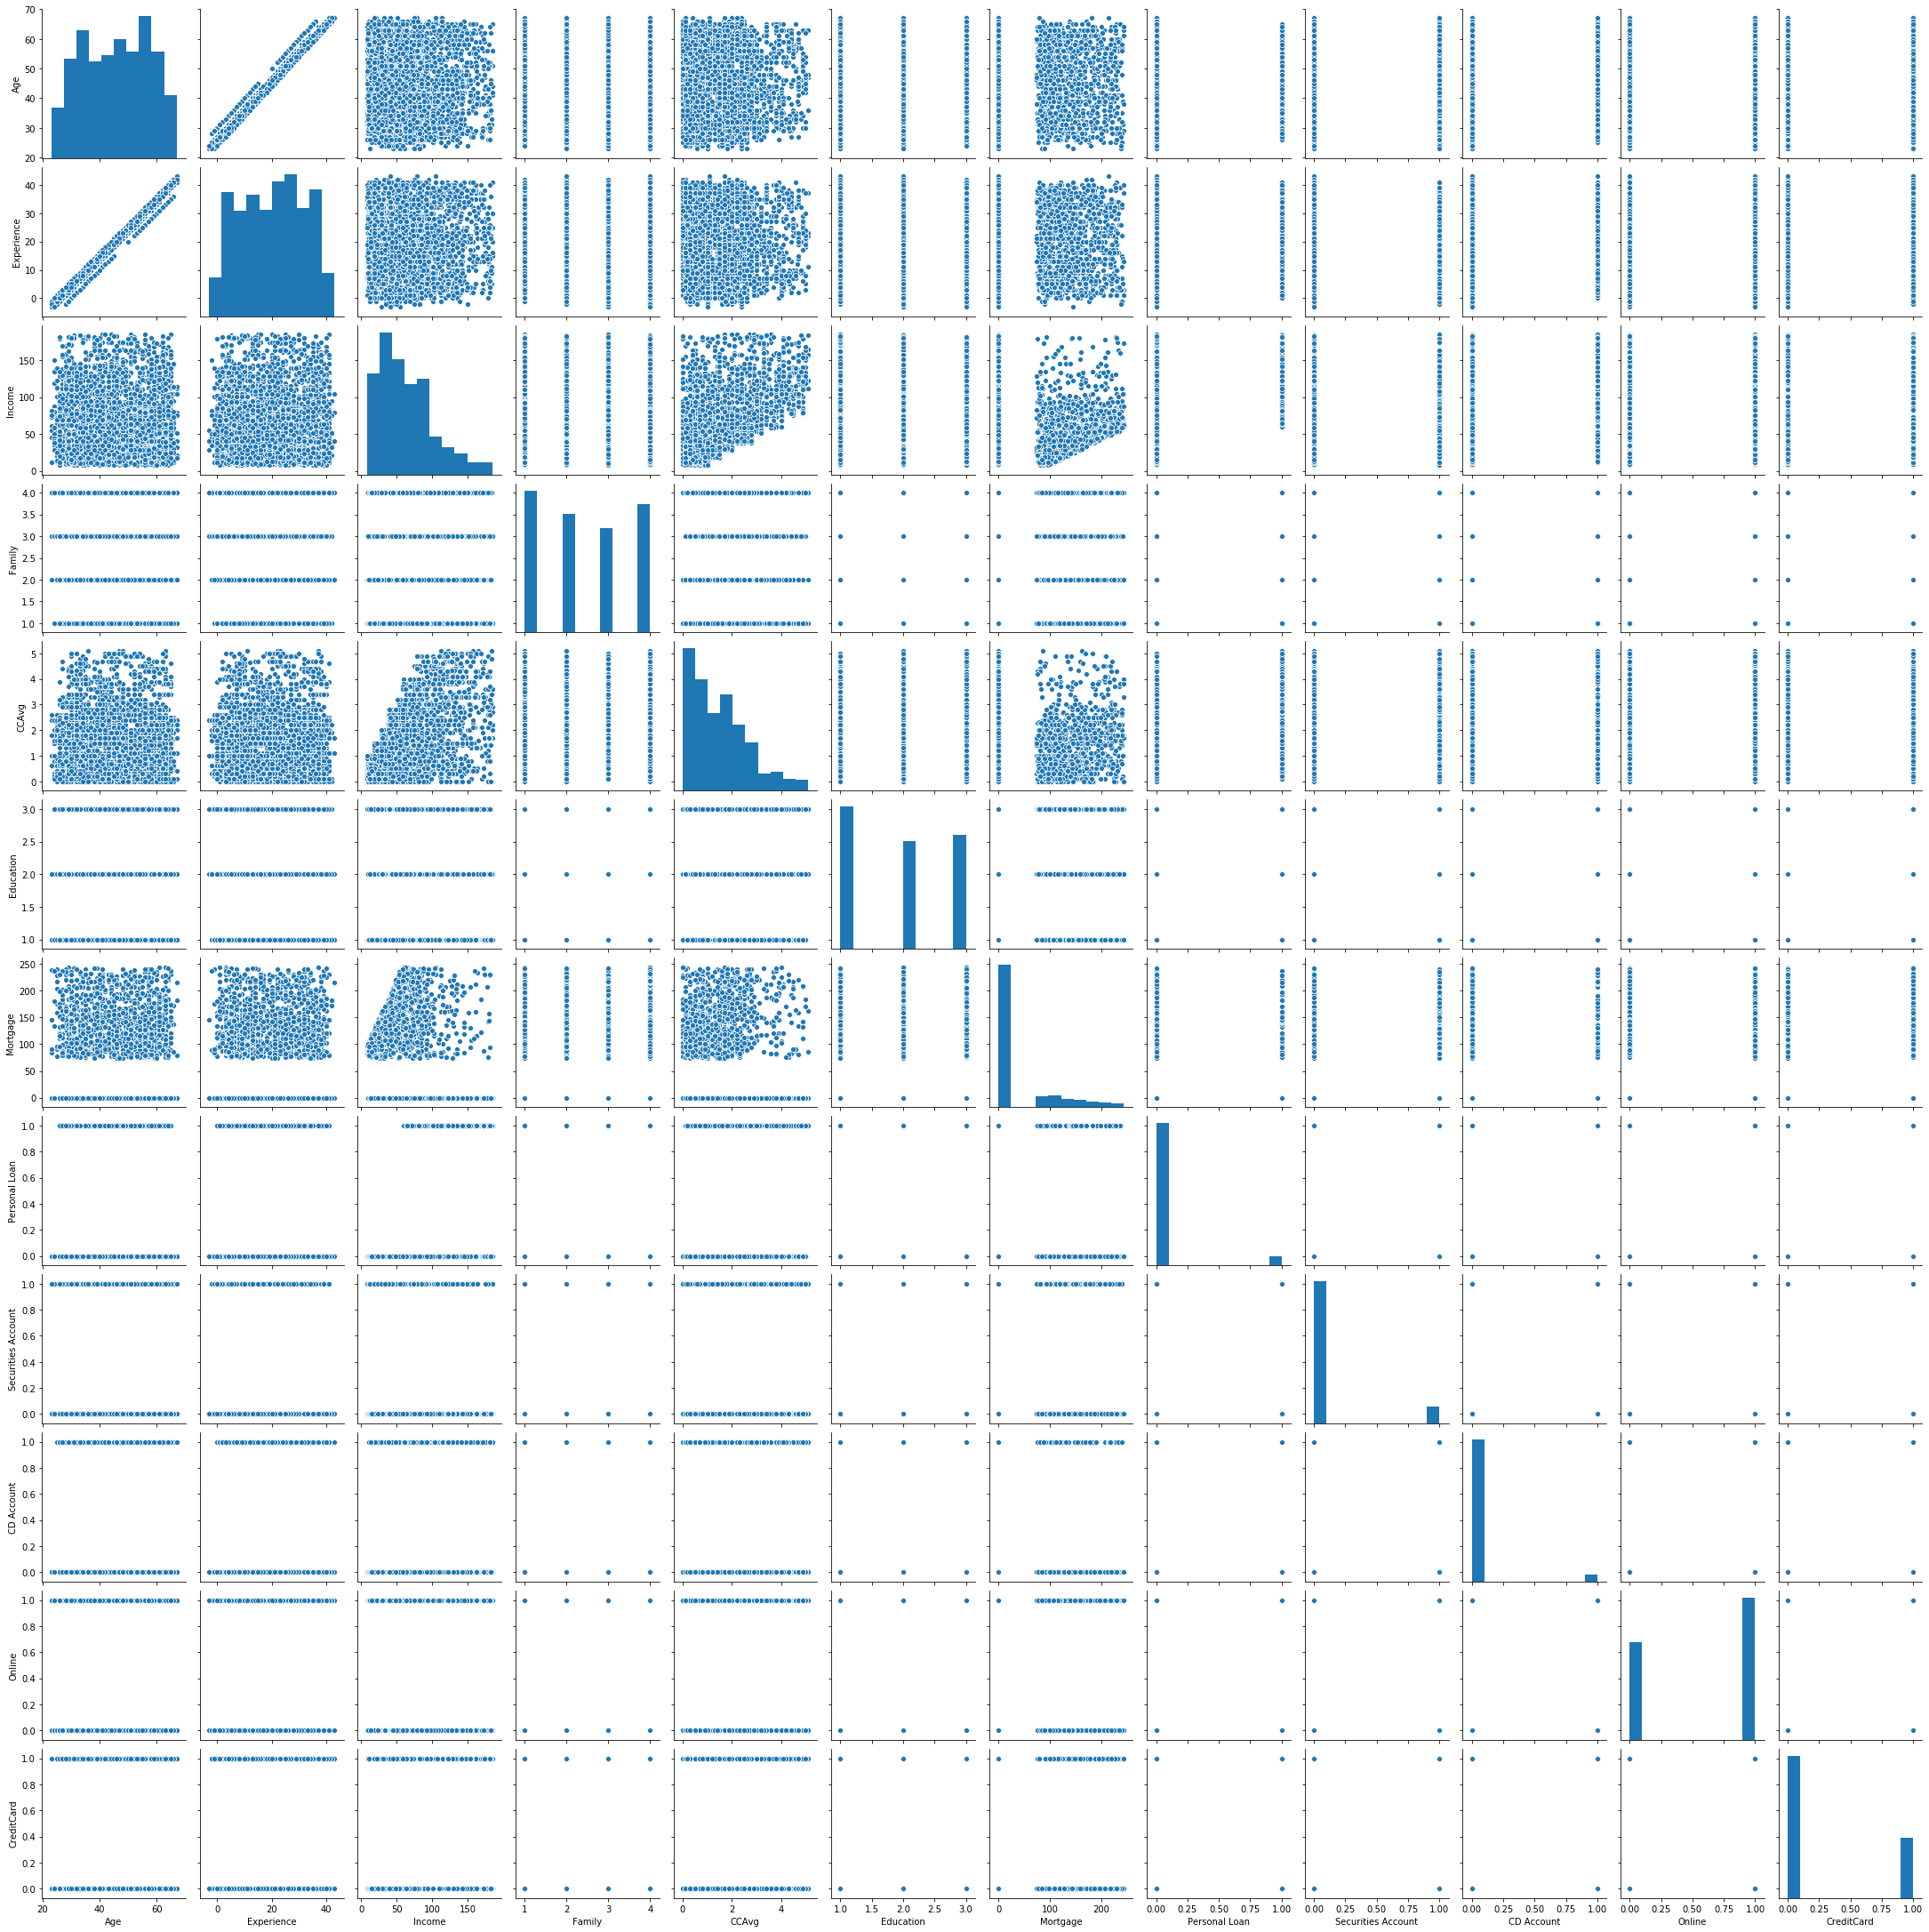

In [ ]:
sns.pairplot(data1)
plt.show()

In [21]:
data1.drop('Age',axis=1)

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,49,4,1.6,1,0,0,1,0,0,0
1,19,34,3,1.5,1,0,0,1,0,0,0
2,15,11,1,1.0,1,0,0,0,0,0,0
3,9,100,1,2.7,2,0,0,0,0,0,0
4,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,3,40,1,1.9,3,0,0,0,0,1,0
4996,4,15,4,0.4,1,85,0,0,0,1,0
4997,39,24,2,0.3,3,0,0,0,0,0,0
4998,40,49,3,0.5,2,0,0,0,0,1,0


In [22]:
x=data1.drop('Personal Loan',axis=1)
y=data1['Personal Loan']


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3486, 11) (872, 11) (3486,) (872,)


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9655963302752294


In [26]:
xeda=x[['Income','CCAvg','CD Account','Education','Online','Securities Account']]

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xeda,y,random_state=20,test_size=0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3486, 6) (872, 6) (3486,) (872,)


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9713302752293578
